# Prepare Data

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
# !git clone https://github.com/WongKinYiu/yolov7.git


Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 24.13 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [ ]:
!pip install roboflow

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 18.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/NTI_GP

/content/drive/MyDrive/NTI_GP


In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="dZtrnF63aDa6P0VhuGkj")
project = rf.workspace("fyp-pz5zs").project("violence-nonviolence-behavior")
version = project.version(34)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`


# Train Yolov8

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/violence_weights (1).pt')  # load a pretrained YOLOv8n detection model
# model.train(data='/content/drive/MyDrive/NTI_GP/Violence-NonViolence-Behavior-34/data.yaml', epochs=30)  # train the model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# from ultralytics import YOLO
# model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model

# Video Analysis

In [ ]:
!pip install transformers --quiet
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 20.8 MB/s eta 0:00:00


In [ ]:
import torch
import cv2
from ultralytics import YOLO

# Define path to video file
source = "/content/surveillance_video.mp4"

# Load the YOLOv8 model and custom weights
model = YOLO('/content/violence_weights.pt')  # Start with a YOLOv8 base model (yolov8n.pt or similar)
# model.load('/content/violence_weights.pt')  # Load custom weights


# Run inference on the source
results = model(source, stream=True)  # generator of Results objects

### Extract Frames

In [ ]:
import cv2
import os

# Initialize a list to hold frames (optional if you want to save them directly)
frames = []

# Specify the output folder where the frames will be saved
output_folder = 'extracted_frames'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Specify how often to save frames, e.g., every 10th frame
frame_interval = 10  # Extract every 10th frame

# Process results list
for idx, result in enumerate(results):
    # Only extract and save every 'frame_interval' frame
    if idx % frame_interval == 0:
        # Extract result details (if needed)
        boxes = result.boxes
        masks = result.masks
        keypoints = result.keypoints
        probs = result.probs
        obb = result.obb

        # Use result.plot() to get the annotated image as a NumPy array
        annotated_frame = result.plot(boxes=False)
        frames.append(annotated_frame)

        # Construct the filename for the image
        image_filename = os.path.join(output_folder, f'frame_{idx:04d}.png')  # e.g., frame_0001.png

        # Save the frame as an image file
        cv2.imwrite(image_filename, annotated_frame)

print(f"Selected frames have been saved to the folder: {output_folder}")



video 1/1 (frame 1/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 1 violence, 80.1ms
video 1/1 (frame 2/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 6.8ms
video 1/1 (frame 3/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 1 violence, 6.8ms
video 1/1 (frame 4/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 1 violence, 6.7ms
video 1/1 (frame 5/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 7.7ms
video 1/1 (frame 6/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 6.0ms
video 1/1 (frame 7/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 1 violence, 7.6ms
video 1/1 (frame 8/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 1 violence, 6.7ms
video 1/1 (frame 9/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 1 violence, 6.5ms
video 1/1 (frame 10/640) /content/surveillance_video.mp4: 384x640 3 nonviolences, 1 violence, 6.0ms
video 1/1 (frame 11/640) /content/surveilla

In [ ]:
# !pip install transformers --quiet

### Generate Cpations

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
# Load BLIP-2 processor and model for caption generation
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
caption_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16).to("cuda")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# import torch
# from torch.quantization import quantize_dynamic

# quantized_caption_model = quantize_dynamic(
#     caption_model,
#     {torch.nn.Linear},  # Specify layers to quantize
#     dtype=torch.qint8  # Use 8-bit integers for weights
# )

# # Test the quantized model on some dummy input if needed
# # This step is optional, just to make sure the model works after quantization
# # Create a dummy input
# dummy_input = torch.randn(1, 3, 224, 224)

# # Inference with quantized model
# with torch.no_grad():
#     outputs = quantized_caption_model(dummy_input)

# # Move the quantized model back to CUDA for inference
# quantized_caption_model.to('cuda')

In [ ]:
import os
import cv2
import torch
from ultralytics import YOLO
from transformers import AutoProcessor, Blip2ForConditionalGeneration
# Load YOLOv8 model for violence detection
yolo_model = YOLO('/content/violence_weights.pt')


# Function to generate caption using BLIP-2
def generate_caption(frame):
    inputs = processor(images=frame, return_tensors="pt").to("cuda", torch.float16)
    with torch.no_grad():
        generated_ids = caption_model.generate(**inputs, max_length=50)
        caption = processor.decode(generated_ids[0], skip_special_tokens=True)
    return caption

# Function to overlay caption on the frame
def overlay_caption_on_frame(frame, caption):
    # Set font and positioning for the caption
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    caption_color = (255, 255, 255)  # White text
    text_position = (50, 50)  # Position of the text on the frame

    # Draw the caption on the frame
    cv2.putText(frame, caption, text_position, font, font_scale, caption_color, font_thickness, cv2.LINE_AA)
    return frame

# Define folders and process results
output_folder = 'processed_frames'
captions_file = 'captions.txt3'  # Ensure correct path for captions
os.makedirs(output_folder, exist_ok=True)

# Open the file to save captions
with open(captions_file, 'w') as f:
    # Load frames from the directory
    frames_folder = '/content/extracted_frames'
    frame_files = [os.path.join(frames_folder, file) for file in os.listdir(frames_folder) if file.endswith(('.png', '.jpg'))]

    for idx, frame_path in enumerate(frame_files):
        # Load the frame
        frame = cv2.imread(frame_path)

        if frame is None:
            print(f"Error loading frame {frame_path}. Skipping.")
            continue

        # Generate a caption using BLIP-2
        caption = generate_caption(frame)

        if caption:  # Check if the caption is not empty
            print(f"Generated caption for frame {idx}: {caption}")

            # Overlay caption on the frame
            annotated_frame_with_caption = overlay_caption_on_frame(frame, caption)

            # Save the frame with caption overlay
            frame_filename = os.path.join(output_folder, f'frame_{idx:04d}.png')
            cv2.imwrite(frame_filename, annotated_frame_with_caption)

            # Save the caption in the captions file
            f.write(f"Frame {idx:04d}: {caption}\n")
        else:
            print(f"Warning: No caption generated for frame {idx}")

print(f"Processed frames saved to {output_folder} and captions saved to {captions_file}")

Generated caption for frame 0: a man is standing in front of a store with a bag

Generated caption for frame 1: a surveillance image shows a man in a store

Generated caption for frame 2: a surveillance image shows a man in a store

Generated caption for frame 3: a man is standing in front of a store with a woman behind him

Generated caption for frame 4: a man is seen in a store with a gun

Generated caption for frame 5: a surveillance image shows a man in a store

Generated caption for frame 6: a man is seen in a store with a bag of money

Generated caption for frame 7: a man in an orange shirt is standing in front of a store

Generated caption for frame 8: a man is standing in front of a store with a gun

Generated caption for frame 9: a man in an orange shirt is standing in front of a store

Generated caption for frame 10: a man is standing in front of a store with a gun

Generated caption for frame 11: a man is seen in a store with a gun

Generated caption for frame 12: a man is s

### Summerize Captions for Report

In [ ]:
!pip install torch --quiet


In [ ]:
!pip install transformers --quiet
!CUDA_LAUNCH_BLOCKING=1 python -c "from transformers import pipeline; summarizer = pipeline('summarization', model='facebook/bart-large-cnn', device=0); print(summarizer('This is a test.'))"

config.json: 100% 1.58k/1.58k [00:00<00:00, 11.7MB/s]
model.safetensors: 100% 1.63G/1.63G [00:11<00:00, 136MB/s]
generation_config.json: 100% 363/363 [00:00<00:00, 2.15MB/s]
vocab.json: 100% 899k/899k [00:00<00:00, 3.62MB/s]
merges.txt: 100% 456k/456k [00:00<00:00, 1.98MB/s]
tokenizer.json: 100% 1.36M/1.36M [00:00<00:00, 5.17MB/s]
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Your max_length is set to 142, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
[{'summary_text': "CNN.com wil

In [ ]:
!export CUDA_LAUNCH_BLOCKING=1


In [ ]:
from transformers import pipeline

# Step 1: Load the text file
def load_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Step 2: Chunking the text into 512 token pieces with overlap
def chunk_text(text, chunk_size=512, overlap=50):
    words = text.split()
    chunks = []
    for i in range(0, len(words), chunk_size - overlap):
        chunks.append(' '.join(words[i:i + chunk_size]))
    return chunks


def deduplicate_summary(summary):
    seen = set()
    deduped = []
    for sentence in summary.split('.'):
        stripped_sentence = sentence.strip()
        if stripped_sentence and stripped_sentence not in seen:
            seen.add(stripped_sentence)
            deduped.append(stripped_sentence)
    return '. '.join(deduped)



# Step 3: Using prompt engineering to guide the summarizer
def condense_text_with_prompt(chunks, summarizer):
    condensed = []
    for chunk in chunks:
        # Custom prompt: instruct the model to summarize accurately without generating new content
        prompt = f"Please summarize the following text, keeping only the key points: \n\n{chunk}"

        summary = summarizer(prompt, max_length=150, min_length=40, do_sample=False)[0]['summary_text']
        condensed.append(summary)

    # Join all condensed summaries into one
    return ' '.join(condensed)



# Step 4: Final Report
def generate_condensed_report_with_prompt(file_path):
    text = load_text_file(file_path)
    chunks = chunk_text(text)

    summarizer = pipeline('summarization', model="facebook/bart-large-cnn", device=0)

    condensed_summary = condense_text_with_prompt(chunks, summarizer)

    # Further condense the intermediate summary
    final_summary_prompt = f"Please summarize this text, keeping only the key points: \n\n{condensed_summary}"
    final_summary = summarizer(final_summary_prompt, max_length=300, min_length=150, do_sample=False)[0]['summary_text']

    # Deduplicate the final summary
    final_summary_deduped = deduplicate_summary(final_summary)

    return final_summary_deduped


# Example usage
file_path = '/content/captions.txt3'
summary_report = generate_condensed_report_with_prompt(file_path)
print("Final Condensed Report:")
print(summary_report)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Your max_length is set to 300, but your input_length is only 149. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)


Final Condensed Report:
Please summarize the following text, keeping only the key points in mind. A surveillance image shows a man in a store, a man with a gun, a shopping cart. A store is seen with a woman behind him, and a man is seen walking down the aisle. Please summarize this text,Keeping only the main points inmind, keep the rest of the text simple and to the point. The key points:  A man is standing in front of a store with a bag. A man in an orange shirt is seen in a video of a man walking through a store. A woman is seen behind a man as he walks down a store aisle. The man in the video is seen holding a bag of money. The woman is also seen looking at a man who appears to be holding a gun


### QA Reatrival Beat Maching Frame

In [ ]:
!pip install sentence-transformers --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 5.8 MB/s eta 0:00:00


Best matching frame: /content/processed_frames/frame_0004.png


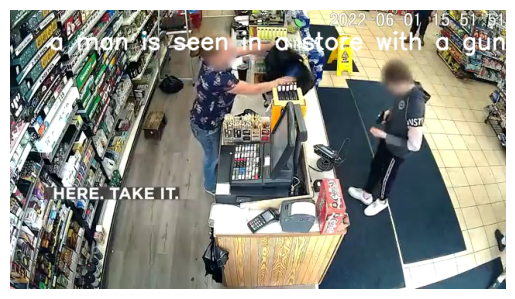

In [ ]:
import os
import torch
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt  # Import matplotlib for image visualization

# Load the pre-trained model for embedding generation
device = torch.device("cpu")

model_st = SentenceTransformer('paraphrase-MiniLM-L6-v2',device=device)

# Path to the extracted frames directory
frame_dir = '/content/processed_frames'  # Update this path

# Load frame captions from captions.txt (assuming frame name -> caption mapping)
def load_captions(caption_file):
    captions = {}
    with open(caption_file, 'r', encoding='utf-8') as f:
        for line in f:
            # Check if the line contains ": " to ensure it's in the expected format
            if ": " in line:
                frame, caption = line.strip().split(": ", 1)
                captions[frame.strip()] = caption.strip()  # Strip whitespace
            # Remove the print statement to skip logging skipped lines
            # else:
            #     print(f"Skipping line: {line.strip()}")  # For debugging purposes
    return captions

# Create a list of frames and their corresponding captions
caption_file = '/content/captions.txt3'  # Update with your actual path
frame_captions = load_captions(caption_file)

# Precompute embeddings for the frame captions
caption_embeddings = {frame: model_st.encode(caption) for frame, caption in frame_captions.items()}

# Query search function
def search_frame_by_caption(query):
    query_embedding = model_st.encode(query)

    # Calculate the similarity score between the query and each frame caption
    frame_similarities = {frame: util.pytorch_cos_sim(query_embedding, caption_embedding).item()
                          for frame, caption_embedding in caption_embeddings.items()}

    # Find the frame with the highest similarity score
    best_frame = max(frame_similarities, key=frame_similarities.get)

    # Format the best frame name correctly
    best_frame_number = best_frame.replace("Frame ", "frame_").replace(" ", "")  # Replace spaces and format
    best_frame_path = os.path.join(frame_dir, f"{best_frame_number}.png")  # Append .png
    return best_frame_path

# Function to display the frame using matplotlib
def display_frame(frame_path):
    try:
        img = Image.open(frame_path)
        plt.imshow(img)  # Display the image using matplotlib
        plt.axis('off')  # Turn off axis labels
        plt.show()  # Show the image
    except FileNotFoundError:
        print(f"File not found: {frame_path}")

# Example usage: search for a frame based on an input question/caption
query = "a man has a gun"  # Input question or caption
best_frame_path = search_frame_by_caption(query)
print(f"Best matching frame: {best_frame_path}")

# Display the best matching frame
display_frame(best_frame_path)


### Gradio Web app

In [ ]:
!pip install gradio --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.1 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import torch
import gradio as gr
from sentence_transformers import SentenceTransformer, util
from transformers import AutoProcessor, Blip2ForConditionalGeneration, pipeline
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt


# Function to generate caption using BLIP-2
def generate_caption(frame):
    inputs = processor(images=frame, return_tensors="pt").to("cuda", torch.float16)
    with torch.no_grad():
        generated_ids = caption_model.generate(**inputs, max_length=50)
        caption = processor.decode(generated_ids[0], skip_special_tokens=True)
    return caption

# Function to extract frames from the video and generate captions
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    output_folder = 'processed_frames'
    os.makedirs(output_folder, exist_ok=True)

    frame_interval = 10  # Process every 10th frame
    frames, captions = [], []

    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % frame_interval == 0:
            caption = generate_caption(frame)
            frames.append(frame)
            captions.append(caption)

            # Save the frame
            frame_filename = os.path.join(output_folder, f'frame_{frame_idx:04d}.png')
            cv2.imwrite(frame_filename, frame)

        frame_idx += 1

    cap.release()
    return frames, captions, output_folder

# Function to search for the best matching frame based on the query
def search_frame_by_caption(query, frame_dir, captions):
    # Precompute embeddings for the frame captions
    caption_embeddings = {f"frame_{idx:04d}": model_st.encode(caption) for idx, caption in enumerate(captions)}

    query_embedding = model_st.encode(query)

    # Calculate the similarity score between the query and each frame caption
    frame_similarities = {frame: util.pytorch_cos_sim(query_embedding, caption_embedding).item()
                          for frame, caption_embedding in caption_embeddings.items()}

    # Find the frame with the highest similarity score
    best_frame = max(frame_similarities, key=frame_similarities.get)

    best_frame_path = os.path.join(frame_dir, f"{best_frame}.png")
    return best_frame_path

# Function to generate a summary report for the video captions
def generate_condensed_report(captions):
    summarizer = pipeline('summarization', model="facebook/bart-large-cnn", device=0)

    # Join captions to form a text document
    captions_text = " ".join(captions)

    # Summarize the video
    summary = summarizer(captions_text, max_length=300, min_length=100, do_sample=False)[0]['summary_text']
    return summary

# Gradio interface function
def video_analysis(video, question):
    # Process video to extract frames and generate captions
    frames, captions, frame_dir = process_video(video)

    # Generate video report summary
    report = generate_condensed_report(captions)

    # Search for the best matching frame for the input question
    best_frame_path = search_frame_by_caption(question, frame_dir, captions)

    # Load the best frame for display
    best_frame_image = Image.open(best_frame_path)

    return report, best_frame_image

# Gradio interface
iface = gr.Interface(
    fn=video_analysis,
    inputs=[gr.Video(label="Input Video"), gr.Textbox(label="Input Question")],
    outputs=[gr.Textbox(label="Summary Report"), gr.Image(label="Best Matching Frame")],
    title="Video Analysis with YOLOv8 and BLIP-2",
    description="Upload a video and ask a question about it. The system will summarize the video and find the best matching frame for your question."
)

# Launch Gradio app
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://39b0f5a9f6b964d219.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
